In [112]:
import pandas as pd

In [113]:
# importing the data from CSV
ratings_df = pd.read_csv('./data/ratings.csv')
movies_df = pd.read_csv('./data/movies.csv')

In [114]:
# seeing how the ratings DF is
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [115]:
ratings_df.shape

(100836, 4)

In [116]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [117]:
def check_nan_percent(df):
    columns_null_count = df.isnull().sum()
    null_percent_df = pd.DataFrame({'null_percent': (columns_null_count/df.shape[0])*100, 'total_null': columns_null_count})
    return null_percent_df[null_percent_df.null_percent>0]

In [118]:
check_nan_percent(ratings_df)

,null_percent,total_null


In [119]:
check_nan_percent(movies_df)

,null_percent,total_null


## Check to see if the same user rated the same movie more than one time

In [120]:
grouped_data = ratings_df.groupby(['userId', 'movieId']).size().reset_index(name='count')
filtered_data = grouped_data[grouped_data['count'] > 1]

In [121]:
grouped_data.head()

,userId,movieId,count
0,1,1,1
1,1,3,1
2,1,6,1
3,1,47,1
4,1,50,1


## Remember to check the uniqueness of movie titles with respect to Id in the movies_df

In [122]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [123]:
print(len(movies_df['title'].unique()))
print(len(movies_df['movieId'].unique()))

9737
9742


In [124]:
grouped_by_title = movies_df.groupby('title').size().reset_index(name='count')
filtered_movies = grouped_by_title[grouped_by_title['count'] > 1]

filtered_movies

,title,count
1939,Confessions of a Dangerous Mind (2002),2
2723,Emma (1996),2
2785,Eros (2004),2
7393,Saturn 3 (1980),2
9287,War of the Worlds (2005),2


Hence, it can be seen that the Movie Titles are repeated and are not unique. 5 of the Movie Titles are repeated.

In [130]:
# ratings_df['movieId'] = ratings_df['movieId'].replace(to_replace=144606, value=6003, inplace=True)

test_data = movies_df[movies_df['title'].isin(filtered_movies['title'])]
sorted_movies = test_data.sort_values(by='title')
counts = ratings_df['movieId'].value_counts()
sorted_movies['the_count'] = sorted_movies['movieId'].map(counts)

sorted_movies

,movieId,title,genres,the_count
4169,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller,16.0
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller,NaN
650,838,Emma (1996),Comedy|Drama|Romance,31.0
5601,26958,Emma (1996),Romance,NaN
5854,32600,Eros (2004),Drama,1.0
9135,147002,Eros (2004),Drama|Romance,1.0
2141,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller,4.0
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller,1.0
5931,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller,50.0
6932,64997,War of the Worlds (2005),Action|Sci-Fi,2.0


Here, it can be seen that the five of the repeated movie titles have different rating count. The title with the lowest number of ratings will be replaced by the other.

## CHECK FOR THE DISTRIBUTIONS IN RATINGS, USERID, MOVIEID

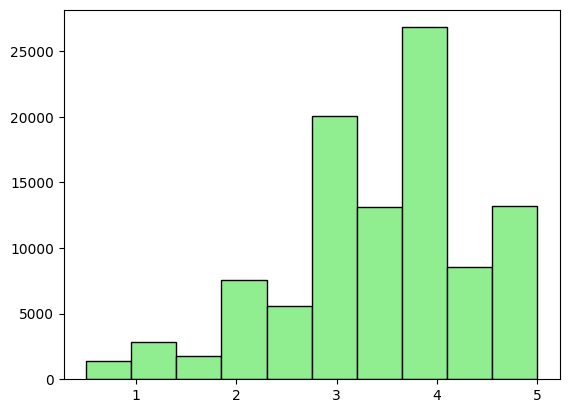

In [138]:
import matplotlib.pyplot as plt

plt.hist(ratings_df['rating'], color='lightgreen', ec='black')
plt.show()

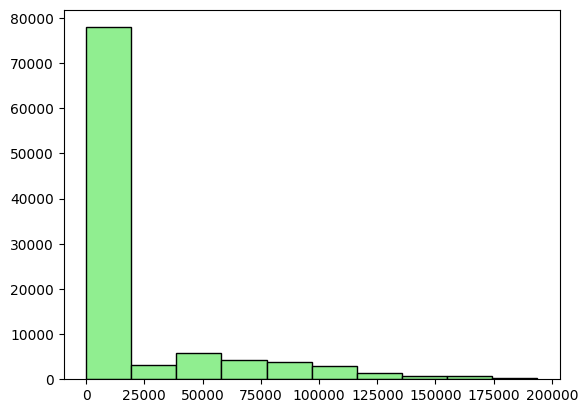

In [139]:
plt.hist(ratings_df['movieId'], color='lightgreen', ec='black')
plt.show()